## Esercizio Classificazione NLP4 - Financial

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/fina.png' width=800>


In [ ]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/financial.csv

In [9]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/financial.csv'

In [4]:
df = pd.read_csv(path)

In [6]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [7]:
patterns = {
            r'\s+': ' ',            # prima e dopo come ultima sostituisce tutti i multipli spazi con uno spazio
            r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',      # remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

words_to_remove = ['https', 'amp']

word_pattern = r'\b(?:{})\b'.format('|'.join(words_to_remove))
patterns[word_pattern] = ''

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement,regex= True)
        df[column] = df[column].str.lower() # applica il lower
    return df

df = clean_column(df, 'Sentence', patterns)

In [8]:
df

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi lows down 150 250 real possibility,negative
2,for the last quarter 2010 componenta net sa...,positive
3,according the finnishrussian chamber commerc...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used summer trainin...,neutral
5839,according shipping company viking line the d...,neutral
5840,the building and home improvement trade sale...,neutral


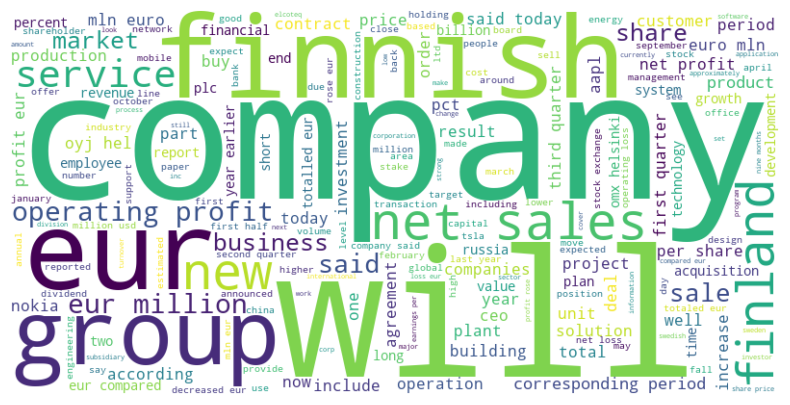

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Sentence']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
X = df['Sentence']
y = df['Sentiment']

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

from sklearn.feature_extraction.text import TfidfTransformer

tfi = TfidfTransformer()
X_tfi = tfi.fit_transform(X_vectorized)


In [ ]:
## STEP1 DEFINIRE ED APPLICARE LA REGEX
## STEP 2 : EDA con WORDCLOUD
##STEP 3: Definizre X e y (features testuali e Target)
##STEP 4: Vettorizzazione - Bag of Words
##STEP 5: TF-IDF
##STEP 6: Split Training and Test
##STEP 7: Modellazione
## Step 8: Pipeline Finale (nuovo train test split su dati raw testuali)